In [2]:
import pandas as pd

# Load dataset using given file path
file_path = r"C:\Users\KIIT0001\Desktop\Mental Health Dataset.csv"
df = pd.read_csv(file_path)

print(df.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np
import time
import os

# =============================
# LOAD ORIGINAL DATASET
# =============================
input_path = r"C:\Users\KIIT0001\Desktop\Mental Health Dataset.csv"
df = pd.read_csv(input_path)

# =============================
# DROP IRRELEVANT COLUMNS
# =============================
df.drop(columns=["Timestamp", "Country"], inplace=True, errors="ignore")

# =============================
# HANDLE INITIAL MISSING VALUES
# =============================
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# =============================
# DAYS_INDOORS → ORDINAL ENCODING
# =============================
days_mapping = {
    "1-14 days": 1,
    "15-30 days": 2,
    "31-60 days": 3,
    "More than 2 months": 4
}
df["Days_Indoors"] = df["Days_Indoors"].map(days_mapping)

# =============================
# TEXT STANDARDIZATION
# =============================
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.lower().str.strip()

# =============================
# LABEL ENCODING (YES / NO)
# Mood_Swings EXCLUDED
# =============================
binary_mapping = {"yes": 1, "no": 0}

label_encode_cols = [
    "self_employed",
    "family_history",
    "treatment",
    "Coping_Struggles",
    "Work_Interest",
    "care_options",
    "Growing_Stress"
]

for col in label_encode_cols:
    df[col] = df[col].map(binary_mapping)

# =============================
# FIX SELF_EMPLOYED MISSING VALUES
# =============================
df["self_employed"] = df["self_employed"].fillna(df["self_employed"].mode()[0])

# =============================
# MOOD_SWINGS → ORDINAL LABEL ENCODING
# low=0, medium=1, high=2
# =============================
mood_mapping = {
    "low": 0,
    "medium": 1,
    "high": 2
}
df["Mood_Swings"] = df["Mood_Swings"].map(mood_mapping)

# =============================
# MEDIAN IMPUTATION
# =============================
df["care_options"] = df["care_options"].fillna(df["care_options"].median())

# =============================
# OCCUPATION ENCODING
# =============================
occupation_mapping = {
    "student": 0,
    "corporate": 1,
    "business": 1,
    "house wife": 0,
    "others": 0
}
df["Occupation"] = df["Occupation"].map(occupation_mapping).fillna(0)

# =============================
# GENDER ENCODING
# =============================
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "male" else 0)

# =============================
# ONE-HOT ENCODING
# Mood_Swings EXCLUDED
# =============================
one_hot_cols = [
    "Changes_Habits",
    "Mental_Health_History",
    "Social_Weakness",
    "mental_health_interview"
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

# =============================
# FINAL MODE IMPUTATION
# =============================
mode_cols = ["Days_Indoors", "Growing_Stress", "Work_Interest"]

for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# =============================
# FINAL CHECK
# =============================
print("\nFinal Dataset Info:")
print(df.info())

print("\nFinal Missing Value Check:")
print(df[mode_cols].isnull().sum())

# =============================
# SAVE FINAL CLEANED DATASET
# =============================
output_path = r"C:\Users\KIIT0001\Desktop\cleaned_final_01.csv"
df.to_csv(output_path, index=False)

print("\n✅ FINAL CLEANED DATASET SAVED SUCCESSFULLY AT:")
print(output_path)



Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         292364 non-null  int64  
 1   Occupation                     292364 non-null  float64
 2   self_employed                  292364 non-null  int64  
 3   family_history                 292364 non-null  int64  
 4   treatment                      292364 non-null  int64  
 5   Days_Indoors                   292364 non-null  float64
 6   Growing_Stress                 292364 non-null  float64
 7   Mood_Swings                    292364 non-null  int64  
 8   Coping_Struggles               292364 non-null  int64  
 9   Work_Interest                  292364 non-null  float64
 10  care_options                   292364 non-null  float64
 11  Changes_Habits_maybe           292364 non-null  bool   
 12  Changes_H

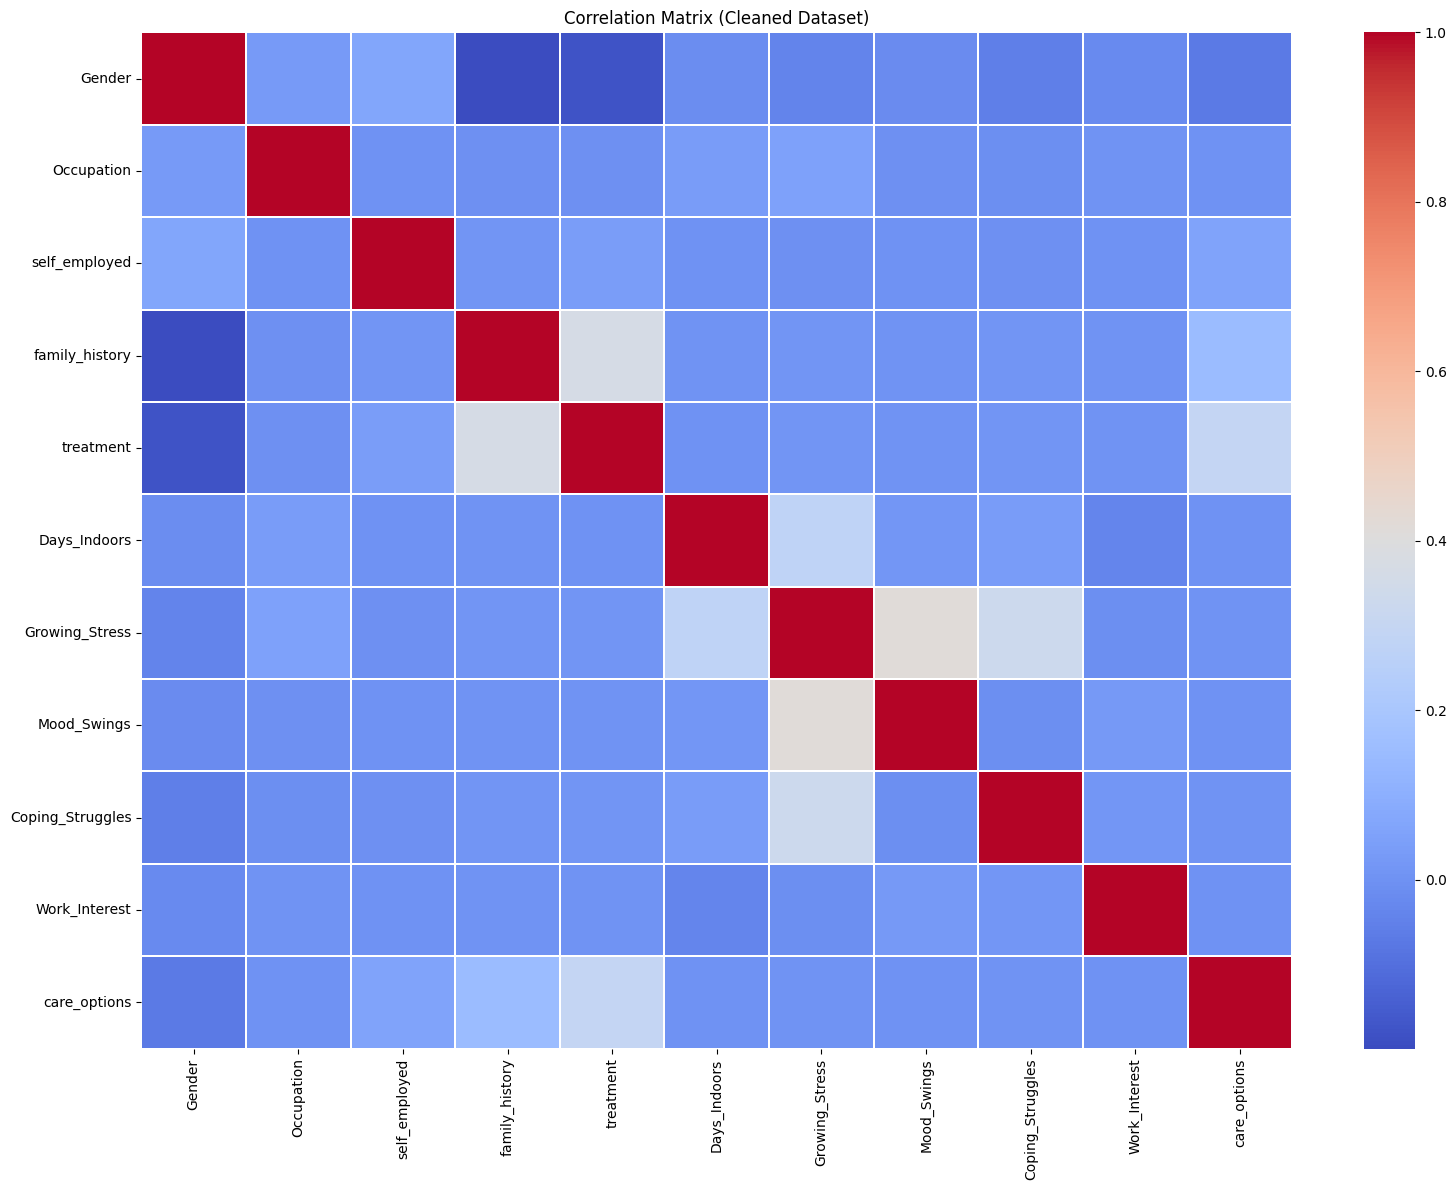

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
path = r"C:\Users\KIIT0001\Desktop\cleaned_final_03.csv"
df = pd.read_csv(path)

# Select only numeric columns
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    linewidths=0.3
)

plt.title("Correlation Matrix (Cleaned Dataset)")
plt.tight_layout()
plt.show()


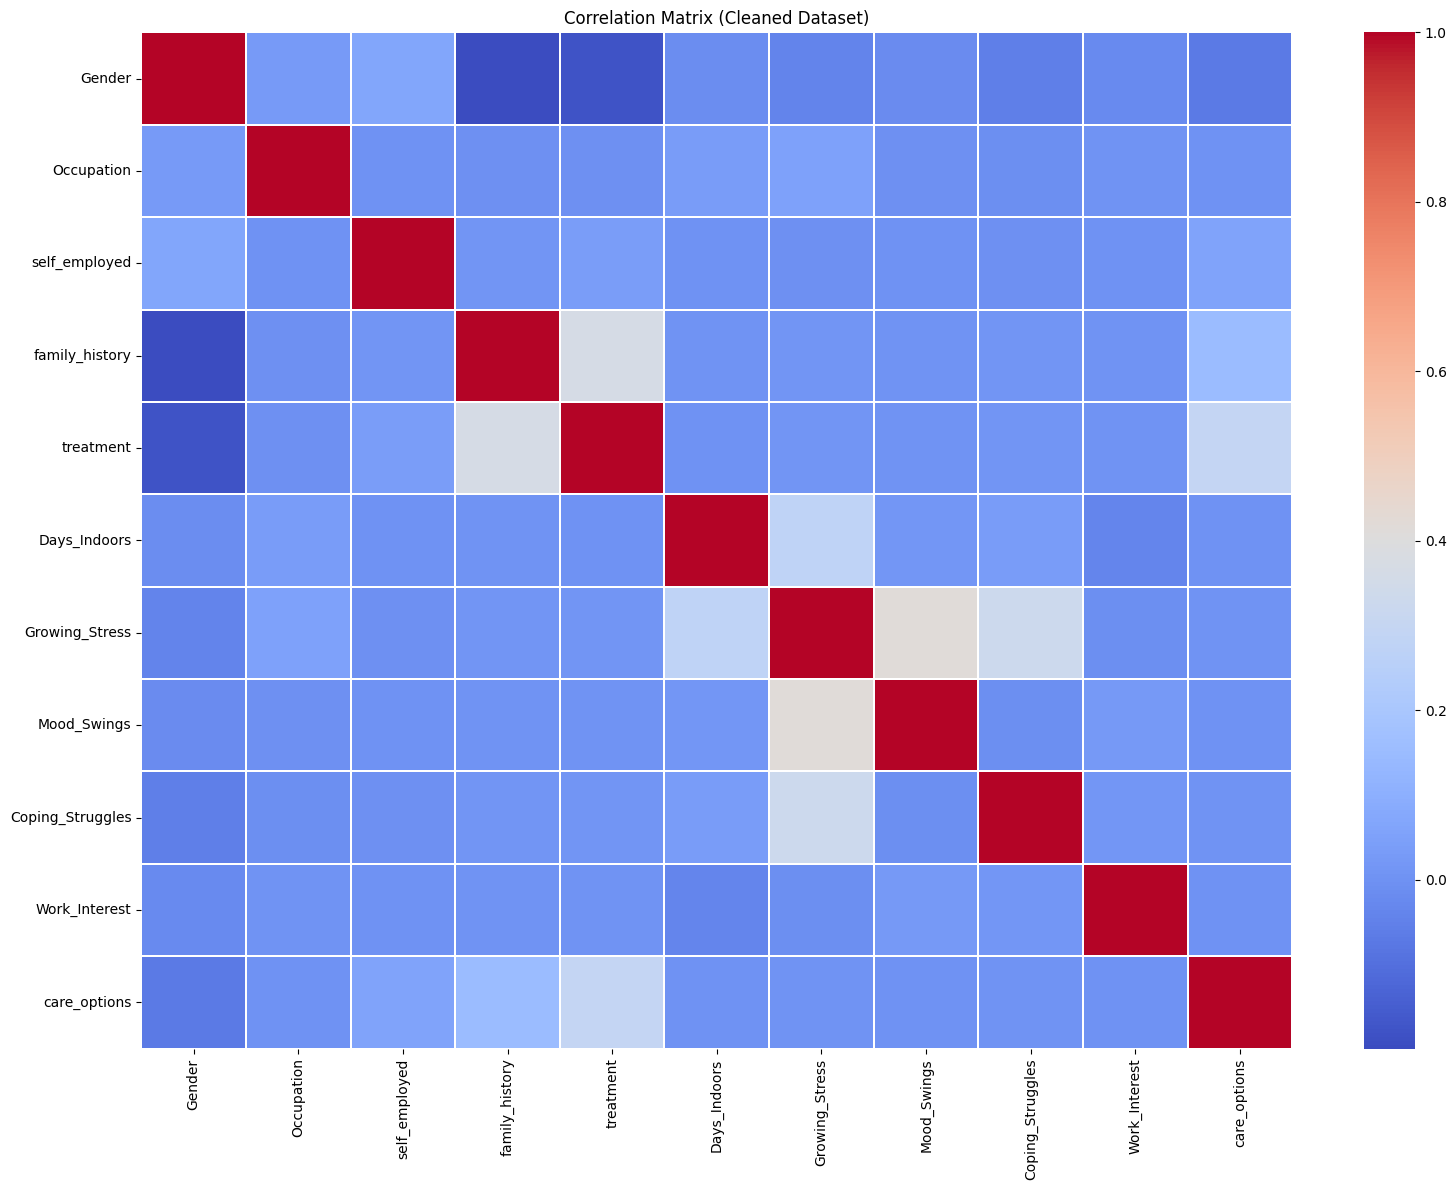

✅ Correlation matrix saved successfully at:
C:\Users\KIIT0001\Desktop\correlation_matrix_cleaned_final_03.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
path = r"C:\Users\KIIT0001\Desktop\cleaned_final_03.csv"
df = pd.read_csv(path)

# Select only numeric columns
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# ================================
# PLOT HEATMAP
# ================================
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    linewidths=0.3
)

plt.title("Correlation Matrix (Cleaned Dataset)")
plt.tight_layout()

# ================================
# SAVE FIGURE TO DESKTOP
# ================================
save_path = r"C:\Users\KIIT0001\Desktop\correlation_matrix_cleaned_final_03.png"
plt.savefig(save_path, dpi=300)

# Show plot
plt.show()

print("✅ Correlation matrix saved successfully at:")
print(save_path)


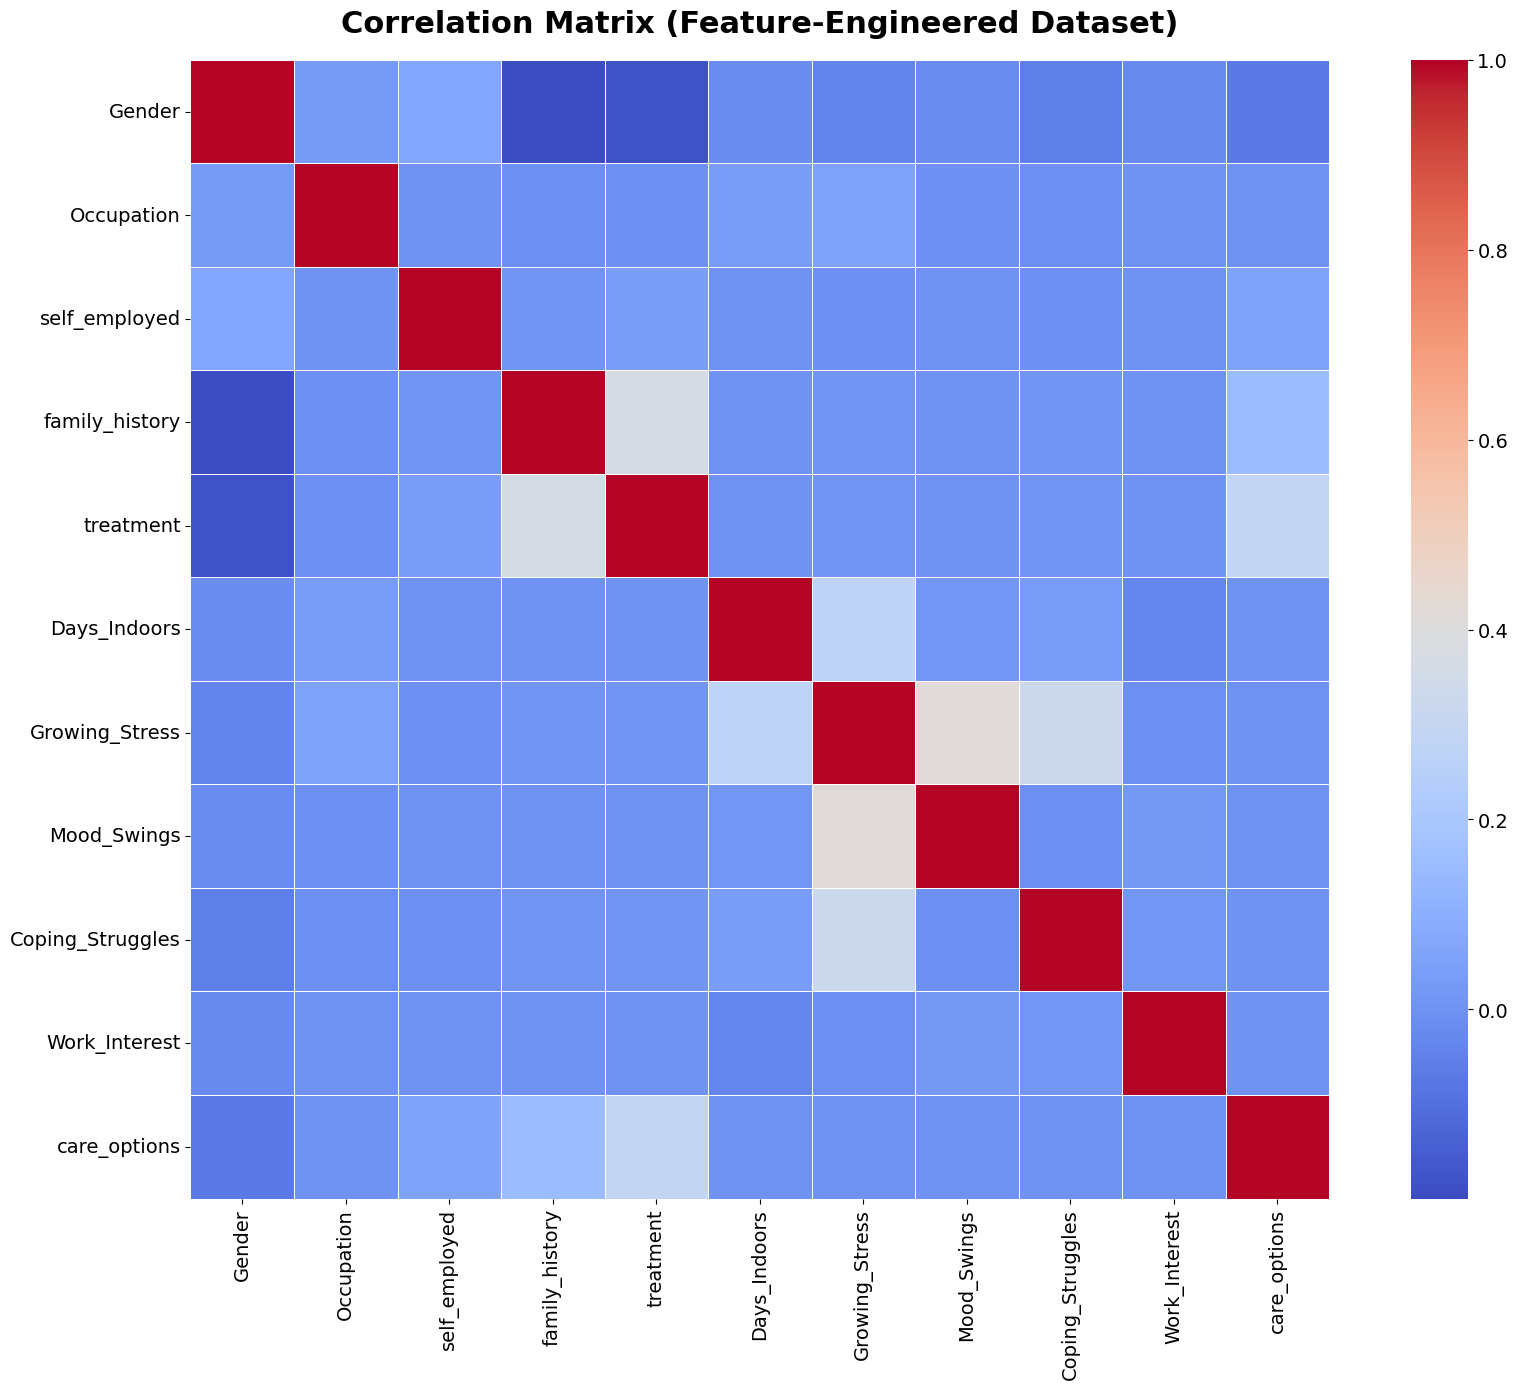

✅ Correlation matrix saved at:
C:\Users\KIIT0001\Desktop\Feature_Engineered_Correlation_Matrix.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# LOAD FEATURE-ENGINEERED DATASET
# ================================
path = r"C:\Users\KIIT0001\Desktop\cleaned_final_03.csv"
df = pd.read_csv(path)

# ================================
# SELECT NUMERIC FEATURES
# ================================
df_numeric = df.select_dtypes(include=["int64", "float64"])

# ================================
# COMPUTE CORRELATION MATRIX
# ================================
corr_matrix = df_numeric.corr(method="pearson")

# ================================
# PLOT CORRELATION HEATMAP
# ================================
plt.figure(figsize=(18, 14))  # larger figure

ax = sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    linewidths=0.4,
    cbar=True,
    square=True
)

# -------- FONT SIZE CONTROL --------
plt.title(
    "Correlation Matrix (Feature-Engineered Dataset)",
    fontsize=22, fontweight="bold", pad=20
)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Colorbar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()

# ================================
# SAVE HIGH-RES IMAGE (PAPER READY)
# ================================
output_path = r"C:\Users\KIIT0001\Desktop\Feature_Engineered_Correlation_Matrix.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print("✅ Correlation matrix saved at:")
print(output_path)


In [14]:
# ==========================================
# IMPORTS
# ==========================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ==========================================
# LOAD DATA
# ==========================================
data_path = r"C:\Users\KIIT0001\Desktop\cleaned_final_01.csv"
df = pd.read_csv(data_path)

X = df.drop(columns=["Growing_Stress"])
y = df["Growing_Stress"]

# ==========================================
# TRAIN TEST SPLIT
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# ==========================================
# EVALUATION FUNCTION
# ==========================================
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print(f"\n{name}")
    print("=" * 70)
    print(f"Accuracy : {acc:.4f}")
    print(classification_report(y_test, y_pred))

    return acc

# ==========================================
# AGGRESSIVELY RETUNED MODELS
# ==========================================
models = {

    # 1️⃣ Logistic Regression (much looser boundary)
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(
            penalty="l1",          # changed from l2 → l1
            solver="liblinear",
            C=3.0,                 # much higher C
            max_iter=15000,
            class_weight=None,
            random_state=42
        ))
    ]),

    # 2️⃣ Naive Bayes (Bernoulli – best for binary-heavy data)
    "Naive Bayes (BernoulliNB)": BernoulliNB(
        alpha=0.05,               # very low smoothing
        binarize=0.0
    ),

    # 3️⃣ AdaBoost (stronger weak learners)
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=3,           # deeper trees
            min_samples_leaf=10,
            random_state=42
        ),
        n_estimators=1200,        # very high
        learning_rate=0.03,       # very low
        algorithm="SAMME",
        random_state=42
    ),

    # 4️⃣ LDA (Shrinkage enabled)
    "LDA": LinearDiscriminantAnalysis(
        solver="lsqr",
        shrinkage="auto"
    ),

    # 5️⃣ QDA (less aggressive regularization)
    "QDA": QuadraticDiscriminantAnalysis(
        reg_param=0.6
    )
}

# ==========================================
# RUN ALL MODELS
# ==========================================
results = {}

for name, model in models.items():
    results[name] = evaluate_model(name, model)

# ==========================================
# FINAL SUMMARY
# ==========================================
print("\nFINAL ACCURACY SUMMARY (ROUND 3)")
print("=" * 70)

for model_name, acc in results.items():
    print(f"{model_name:<35} : {acc:.4f}")



Logistic Regression
Accuracy : 0.6822
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     18581
         1.0       0.68      1.00      0.81     39892

    accuracy                           0.68     58473
   macro avg       0.34      0.50      0.41     58473
weighted avg       0.47      0.68      0.55     58473



c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av


Naive Bayes (BernoulliNB)
Accuracy : 0.6822
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     18581
         1.0       0.68      1.00      0.81     39892

    accuracy                           0.68     58473
   macro avg       0.34      0.50      0.41     58473
weighted avg       0.47      0.68      0.55     58473



c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av


AdaBoost
Accuracy : 0.7413
              precision    recall  f1-score   support

         0.0       0.71      0.32      0.44     18581
         1.0       0.75      0.94      0.83     39892

    accuracy                           0.74     58473
   macro avg       0.73      0.63      0.63     58473
weighted avg       0.73      0.74      0.71     58473


LDA
Accuracy : 0.6822
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     18581
         1.0       0.68      1.00      0.81     39892

    accuracy                           0.68     58473
   macro avg       0.34      0.50      0.41     58473
weighted avg       0.47      0.68      0.55     58473



c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av


QDA
Accuracy : 0.6822
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     18581
         1.0       0.68      1.00      0.81     39892

    accuracy                           0.68     58473
   macro avg       0.34      0.50      0.41     58473
weighted avg       0.47      0.68      0.55     58473


FINAL ACCURACY SUMMARY (ROUND 3)
Logistic Regression                 : 0.6822
Naive Bayes (BernoulliNB)           : 0.6822
AdaBoost                            : 0.7413
LDA                                 : 0.6822
QDA                                 : 0.6822


c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ==========================================
# ADABOOST FINAL TUNING
# ==========================================
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=6,              # ⬆ slightly deeper
        min_samples_leaf=15,      # ⬇ allow more splits
        min_samples_split=40,
        max_features="sqrt",      # ⬅ reduces overfitting
        random_state=42
    ),
    n_estimators=3000,            # ⬆ stronger ensemble
    learning_rate=0.01,           # ⬇ ultra-slow learning
    algorithm="SAMME",
    random_state=42
)

# Train
adaboost_model.fit(X_train, y_train)

# Predict
y_pred = adaboost_model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)

print("\nAdaBoost (Final Tuned)")
print("=" * 60)
print(f"Accuracy : {acc:.4f}")
print(classification_report(y_test, y_pred))


c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(



AdaBoost (Final Tuned)
Accuracy : 0.9381
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90     18581
         1.0       0.93      0.98      0.96     39892

    accuracy                           0.94     58473
   macro avg       0.94      0.91      0.93     58473
weighted avg       0.94      0.94      0.94     58473



In [5]:
# ============================================
# IMPORTS
# ============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# ============================================
# LOAD DATASET
# ============================================
data_path = r"C:\Users\KIIT0001\Desktop\cleaned_final_01.csv"
df = pd.read_csv(data_path)

print("✅ Dataset Loaded")
print("Shape:", df.shape)

X = df.drop(columns=["Growing_Stress"])
y = df["Growing_Stress"]

# ============================================
# TRAIN TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ============================================
# EVALUATION FUNCTION
# ============================================
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("-" * 50)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


# ============================================
# 1️⃣ LOGISTIC REGRESSION (INTERACTION BOOST)
# ============================================
logreg_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        penalty="l2",
        C=5,
        max_iter=5000,
        solver="lbfgs",
        random_state=42
    ))
])

evaluate_model("Logistic Regression (Polynomial Interactions)", logreg_pipeline)


# ============================================
# 2️⃣ LINEAR SVM (INTERACTION BOOST)
# ============================================
svm_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(
        C=2,
        max_iter=5000,
        random_state=42
    ))
])

evaluate_model("Linear SVM (Polynomial Interactions)", svm_pipeline)


# ============================================
# 3️⃣ LDA (AFTER INTERACTION EXPANSION)
# ============================================
lda_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis())
])

evaluate_model("LDA (Polynomial Feature Space)", lda_pipeline)


✅ Dataset Loaded
Shape: (292364, 23)

Logistic Regression (Polynomial Interactions)
--------------------------------------------------
Accuracy: 0.7052143724454022
              precision    recall  f1-score   support

         0.0       0.58      0.25      0.35     18545
         1.0       0.72      0.92      0.81     39928

    accuracy                           0.71     58473
   macro avg       0.65      0.58      0.58     58473
weighted avg       0.68      0.71      0.66     58473


Linear SVM (Polynomial Interactions)
--------------------------------------------------
Accuracy: 0.7045644998546338
              precision    recall  f1-score   support

         0.0       0.59      0.23      0.33     18545
         1.0       0.72      0.93      0.81     39928

    accuracy                           0.70     58473
   macro avg       0.65      0.58      0.57     58473
weighted avg       0.68      0.70      0.66     58473


LDA (Polynomial Feature Space)
--------------------------------

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
path = r"C:\Users\KIIT0001\Desktop\cleaned_final_01.csv"
df = pd.read_csv(path)

X = df.drop(columns=["Growing_Stress"])
y = df["Growing_Stress"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline
lr_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        C=5,
        penalty="l2",
        solver="lbfgs",
        max_iter=5000,
        random_state=42
    ))
])

# Train
lr_pipeline.fit(X_train, y_train)

# Predict probabilities
y_prob = lr_pipeline.predict_proba(X_test)[:, 1]

# Custom threshold
threshold = 0.35
y_pred = (y_prob >= threshold).astype(int)

print("Logistic Regression (Polynomial + Threshold)")
print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression (Polynomial + Threshold)
Threshold: 0.35
Accuracy: 0.7025977801720452
              precision    recall  f1-score   support

         0.0       0.73      0.10      0.17     18545
         1.0       0.70      0.98      0.82     39928

    accuracy                           0.70     58473
   macro avg       0.72      0.54      0.50     58473
weighted avg       0.71      0.70      0.61     58473



In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
path = r"C:\Users\KIIT0001\Desktop\cleaned_final_01.csv"
df = pd.read_csv(path)

X = df.drop(columns=["Growing_Stress"])
y = df["Growing_Stress"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline
svm_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(
        C=1.0,
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ))
])

# Train
svm_pipeline.fit(X_train, y_train)

# Predict
y_pred = svm_pipeline.predict(X_test)

print("Linear SVM (Polynomial Features)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Linear SVM (Polynomial Features)
Accuracy: 0.6410138012415987
              precision    recall  f1-score   support

         0.0       0.46      0.68      0.54     18545
         1.0       0.81      0.62      0.70     39928

    accuracy                           0.64     58473
   macro avg       0.63      0.65      0.62     58473
weighted avg       0.69      0.64      0.65     58473



In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
path = r"C:\Users\KIIT0001\Desktop\cleaned_final_01.csv"
df = pd.read_csv(path)

X = df.drop(columns=["Growing_Stress"])
y = df["Growing_Stress"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline
lda_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis(
        solver="eigen",
        shrinkage=0.3
    ))
])

# Train
lda_pipeline.fit(X_train, y_train)

# Predict
y_pred = lda_pipeline.predict(X_test)

print("LDA (Shrinkage Tuned)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


LDA (Shrinkage Tuned)
Accuracy: 0.6828450737947429
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     18545
         1.0       0.68      1.00      0.81     39928

    accuracy                           0.68     58473
   macro avg       0.34      0.50      0.41     58473
weighted avg       0.47      0.68      0.55     58473



c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av